## Logistic Regression

$$p^{'} = \sigma(\theta ^T . x) $$
$$(\theta ^T . x) = odds\_ratio$$
Main Ideas:
1. Logistic Regression Model the probability based on combination of response taken by predictors.
2. Sigmoid function scales the output in the range [0, 1]
3. $Beta^t* X$ - odds ratio, **Beta** can be solved for by minimizing the cost function as devived in the [link below](https://thelaziestprogrammer.com/sharrington/math-of-machine-learning/solving-logreg-newtons-method).
4. **Deviance is the logistic regression's anolog for sum of square errors.** 
    $$ Deviance = 2*\log * \frac{Likelihood \_of \_Saturated\_ model}{Likelihood \_of\_ current\_ model}$$
    
    Larger the Deviance, poored the fit !!!
5. Deviance residuals for i-th observation can be used to find the outliers. See Class noted for details.. 
6. R-sq (goodness of fit) equivalence in logistic regression can be McFadden's R-sq or Hosmer-Lemeshow goodness of fit test

### Beta - Estimations
1. **Numerical Method**: Using the Newton's method for numerical estimations. However, without getting too deep into it, the cost function for a single instance can be written as:
  $$ c(\theta) = -log(p^{'}),;  y = 1$$
  $$ c(\theta) = -log(1 - p^{'}); y = 0$$
  
  This essetially means that when probability is low for y = 1, then assign high cost and similar ider for y = 0. The cost function over all the training data points can be written as:
  $$ J(\theta) = \frac{1}{m}\Sigma[y*log(p^{'}) + (1-y)*log(1-p^{'})]$$
 
 Parameter updates can be found using the partial derivatives:
  $$ \frac{\delta}{\delta \theta_j}J(\theta) = \frac{1}{m}\Sigma(\sigma(\theta^T . x) - y)x$$

2. **Normal form** - I think Beta's can also be estimated by normal form as in Linear Regrassion, but in this case the response would be the odds ratio. I still have to work out the algorithm for it.


ref:
- https://www.theanalysisfactor.com/r-glm-model-fit/
- https://thelaziestprogrammer.com/sharrington/math-of-machine-learning/solving-logreg-newtons-method

## Softmax or Multinomial Logistic Regression
The cost function here is called the Cross-Entropy, the idea is the same as before.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.linear_model as lm
import sklearn.metrics as metric

import warnings
warnings.filterwarnings("ignore", message="Line Search failed")
warnings.filterwarnings("ignore", message="The line search algorithm did not converge")

In [2]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [5]:
df = pd.read_csv("datasets/lr_data.csv")
df = df.drop(columns="Unnamed: 0")
# df_train = df.iloc[0:1500]
# df_test = df.iloc[1500:]
df_train, df_test = split_train_test(df, 0.2)
print(df.shape)
print(df_train.shape)
print(df_test.shape)
df.head()

(1890, 6)
(1512, 6)
(378, 6)


,is_booked,tmv,demand_supply_ratio,price,category_grouped,month
0,0,14569,1.902318,30.0,1,5
1,1,4201,14.622831,39.0,0,5
2,1,5724,8.659708,24.0,1,4
3,1,39102,13.570390,121.0,2,12
4,0,9666,1.297453,42.0,1,8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 6 columns):
is_booked              1890 non-null int64
tmv                    1890 non-null int64
demand_supply_ratio    1890 non-null float64
price                  1890 non-null float64
category_grouped       1890 non-null int64
month                  1890 non-null int64
dtypes: float64(2), int64(4)
memory usage: 88.7 KB


In [7]:
df.describe()

,is_booked,tmv,demand_supply_ratio,price,category_grouped,month
count,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000
mean,0.537566,14136.074603,6.043046,45.396825,1.333333,6.713757
std,0.498719,9340.612268,3.951393,22.193485,0.984259,3.581623
min,0.000000,3875.000000,0.463101,10.000000,0.000000,1.000000
25%,0.000000,7115.000000,3.002744,30.000000,1.000000,3.000000
50%,1.000000,10850.000000,5.694339,39.000000,1.000000,7.000000
75%,1.000000,18802.000000,8.431289,52.000000,2.000000,10.000000
max,1.000000,39102.000000,23.333333,134.000000,4.000000,12.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b984a90>,
      dtype=object)

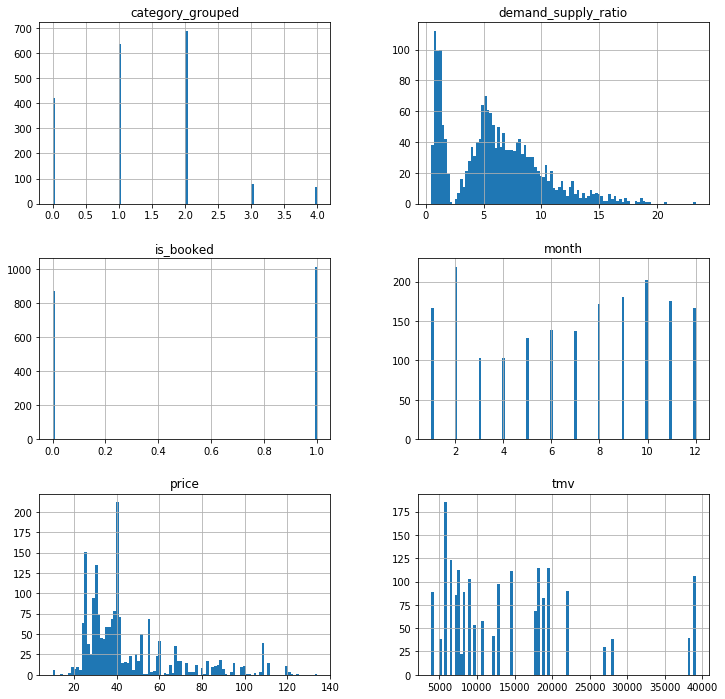

In [8]:
df.hist(figsize=(12, 12), bins=100)

In [9]:
X_train = df_train[["tmv", "demand_supply_ratio", "price", "category_grouped", "month"]]
y_train = df_train["is_booked"]
X_test = df_test[["tmv", "demand_supply_ratio", "price", "category_grouped", "month"]]
y_test = df_test["is_booked"]

model = lm.LogisticRegression(solver='newton-cg').fit(X_train, y_train)


## mean accuracy on the given dataset

In [10]:
print("mean Accuracy on train set: {0}".format(model.score(X_train, y_train)))
print("mean Accuracy on test set: {0}".format(model.score(X_test, y_test)))

mean Accuracy on train set: 0.6924603174603174
mean Accuracy on test set: 0.7195767195767195


## Predict class labels for samples in X.

[[111  62]
 [ 44 161]]


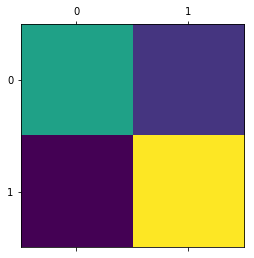

In [11]:
l_pred = list(model.predict(X_test))
l_gt = list(y_test)
cm = metric.confusion_matrix(l_gt, l_pred)
print(cm)
plt.matshow(cm)
plt.show()

#### Let's try cross validation based accuracy

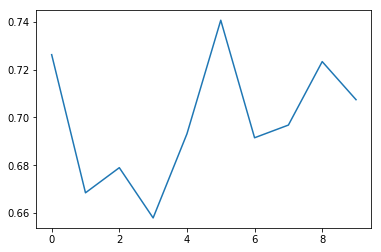

In [8]:
from sklearn.model_selection import cross_val_score

scores= cross_val_score(model, X=df[["tmv", "demand_supply_ratio", "price", "category_grouped", "month"]],\
                y=df["is_booked"], cv=10, scoring="accuracy")
plt.plot(range(10), scores)
plt.show()

#### Plot precision-recall curve

In [9]:
y_scores = model.decision_function(X_train)

In [10]:
y_scores

array([ 1.53325981, -2.36787167, -0.29865533, ...,  0.39982551,
       -0.44906871, -1.04809023])

In [11]:
from sklearn.metrics import precision_recall_curve

p, r, t = precision_recall_curve(y_train, y_scores)

# Plot the curve
def plot_precision_recall_vs_threshold(p, r, t):
    plt.figure(figsize=(10,6))
    plt.plot(t, p[:-1], "b--", label="Precision")
    plt.plot(t, r[:-1], "g-", label="Recall")
    plt.xlabel("Thershold")
    plt.legend(loc="center right")
    plt.ylim([0,1])
    plt.grid()

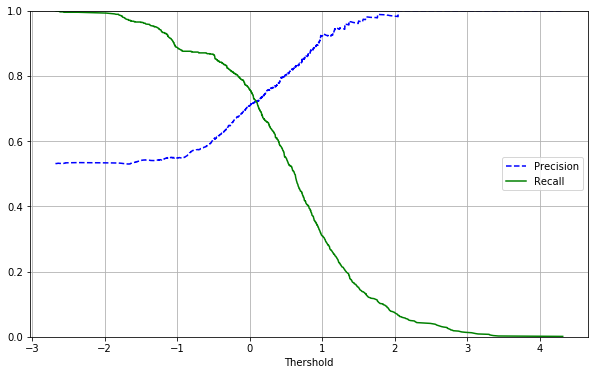

In [12]:
plot_precision_recall_vs_threshold(p, r, t)

I can select some threshold of 0.25 instead of 0, which is the default value 

### ROC CUrve

In [13]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title("ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")

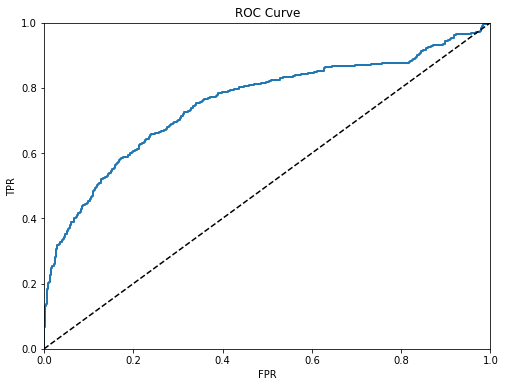

In [14]:
plot_roc_curve(fpr, tpr)